# Chapter 1: The Machine Learning Landscape
------
------

## What is Machine Learning?
------

Machine learning is the science/ art of programming computers so they _learn from data_

> A computer program is said to learn from experience E with respect to some task T and some preformance measure P, if its preformance on T, as measured by P, impoves with Experience E

## Why Use Machine Learning?
------

#### Spam Filter, traditional programming
1. Look at spam emails and discover patterns, such as: certain works or phrases in the subject, patterns in senders name, and in the body.
2. Write algorithm to detect each of the patterns that were noticed in step 1, and flag emails as spam if a number of those patterns are detected.
3. Test your solution and repeat step 1 and 2 until its good enough.

Issue with this solution is:
- Long list of complex rules which are hard to maintain and for others to understand.

#### Machine learning approach
- those patters are learned by the algorithm.
- program is shorter and easier to maintain, and more accurate.

#### Other Areas of ML
- problems that are too complex for traditional approaches or have no known algorithm. (Speech Recognition)
- help us learn more about the problem, by revealing unsuspected correlations in the data.
- can adapted to new data

## Types of Machine Learning Systems
------

Classify them in broad categories based on:
- Whether or not they are trained with human supervision.
- Whether or not they can learn incrementally on the fly.
- Whether they work by comparing new data points to knwon data point or instead detect patterns in the training data and build a predictive model.

#### Supervised/Unsupervised Learning
4 major categories:
- supervised learning
- unsupervised learning
- semisupervised learning
- reinforcement learning

##### Supervised Learning
- Training data contains desired solution, `Labels`
- typical tasks classification, regression

_NOTE: In ML `attribute` is data type, `feature` is an `attribute` plus its value_

important SL algorithms
- k-nearest neighbors
- linear regression
- logistic regression
- support vector machines
- decision trees and random forests
- neural networks(some of them)

##### Unsupervised Learning
The training data is `unlabeled`

important UL algorithms
- clustering
	- k-means
	- hierarchical cluster analysis
	- expectation maximization
- visualization and dimensionality reduction
	- principal component analysis
	- kernel pca
	- locally-linear embedding
	- t-distrivuted stochastic neighbor embedding
- association rule learning
	- apriori
	- eclat

_dimensionality reduction_ goal is to simplify data without losing too much information, or to merge features together into one feature, called `feature extraction`

_NOTE: Good idea to preform `feature extraction` on training set. ML algo will run faster, use less memory and sometimes preform better_

##### Semisupervised Learning
Data set is partially labeled, usually more unlabeled. Most SEMIL algorithms are combinations of SL and UL.

##### Reinforcement Learning
The learning system, called the `agent`, can observe the environmnt, select and preform actions and get rewards in return. It must learn what is the best strategy itself, called a `policy`.

#### Batch and Online Learning

##### Batch Learning
System is incapable of learning incrementally: its is trained using laods of data, which takes time and compute resources. 
1. system is trained.
2. launched in production, doesn't learn anymore, just applies what it learnt.

To know about new data, system must be trained on it, and placed in production, but this can be automated. Not so great in situations where you have a limit of compute resources, and not much time or data is repidly changing.

##### Online Learning
Train system incrementally, by feeding data instances sequentially, either idividually or in mini-batch. Learning steps are fast and cheap.
Great for systems that receive a continuous flow of data. Used to train systems on huge datasets that cannot fit in main memory `out-of-core learning`
requires monitoring system closely, and to sanity check inputs.

#### Instance-Based Vs Model-Based Learning

##### Instance-Based
To learn by heart, then generalizes to new cases using a similarity measure.

##### Model-Based
Build a model of these examples and use that model to make predictions.

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
import os
datapath = os.path.join("datasets", "lifesat", "")
print(os.getcwd())

/home/thomas/PycharmProjects/HandsOnML


In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import  pandas as pd
import sklearn.linear_model as lm

# load data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [12]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [13]:
oecd_bli.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3292.0,0.0,0.0,3292.000000
mean,0.0,NaN,NaN,4774.392587
std,0.0,NaN,NaN,13941.537833
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,6.600000
50%,0.0,NaN,NaN,49.000000
75%,0.0,NaN,NaN,90.000000
max,0.0,NaN,NaN,145769.000000


In [14]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [17]:
gdp_per_capita.describe()

,2015,Estimates Start After
count,187.000000,188.000000
mean,12590.961401,1969.250000
std,17387.035890,291.147823
min,220.860000,0.000000
25%,1783.538000,2011.000000
50%,5373.633000,2013.000000
75%,15490.576500,2014.000000
max,101994.093000,2015.000000


In [18]:
# prepare data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [20]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

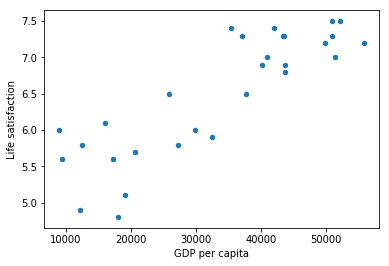

In [22]:
# visualize
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [27]:
# Select model
lin_reg_model = lm.LinearRegression()
# train model
lin_reg_model.fit(X,y)
# make predictions
X_new = [[22587]] # cyprus gdp
lin_reg_model.predict(X_new)

array([[5.96242338]])

In Summary:
- studied data
- selected a model
- trained  model on training data
- applied model to make predictions

## Main Challenges of Machine Learning
-----

Main task is to selected a model and train it on data. 2 things can go wrong, `bad algorithm` or `bad data`.

#### Insufficient Quantity of Training Data

#### Nonrepresentative Training Data
important to use data that is representative of the case you want to generalize to. Difficult do to `sampling noise`, or method used to sample data was flawed `sampling bias`

#### Poor-Quality Data
Data is full of errors, outliers and noise. Important to clean data.
- if some instances are clearly outliers, may help to discard them or manually fix them.
- if some instances are missing features, decide on whether you want to ignore, the `attribute`, the instances, or fill missing values.

#### Irrelevant Features
garbage in, garbage out. Selecting a good set of features to train on is important called `feature engineering` involves:
- feature selection
- feature extraction
- creating new features

#### Overfitting the Training Data
overgeneralization. Preforms well on training data, but does not generalize well. Happens when model is too complex relative to the amount and noise of the training data. Solutions:
- simplify model
- more training data
- reduce noise in training data
- regularization

#### Underfitting the Training Data
Model is too simple to learn the underlying structure of data. Solutions:
- more powerful model
- feeding better features
- reducing the constrains(regularization hyperparameter)

## Testing and Validating
-----

Split data into two sets, `test set` and `training set`. The error rate on new cases is called the `generalization error`, and by evaluating model on test set, you get an estimation of this error. Telling us how well the model will preform on instances it has not seen.

training error low, but test error high -> overfitting

validation set is used to adjust hyperparameters. Common to use cross-validation to not wast too much of the training set. once best hyperparameters selected apply model on training to get `generalization error`.

## Exercises
-----

1. How would you define ML?
	> A computer program is said to learn from experience E with respect to some task T and some preformance measure P, if its preformance on T, as measured by P, impoves with Experience E
2. Can you name four types of problems where is shines?
	- where no algorithmic solution is known
	- replace long rule list
	- help humans
	- adapt to fluctuating environments
3. What is a labeled training set?
	> data contains solutions or outcomes, or is classifed. use supervised or semisupervised learning
4. What are the two most common supervised tasks?
	- classification
	- regression
5. Can you name four common unsupervised tasks?
	- clustering
	- visualization
	- dimensionality reduction
	- association rule learning
6. What type of ML algo would allow a robot to walk in various terrains?
	> rienforcement learning
7. What type of algo would you use to segment customers into multiple groups?
	> if I know the groups and features then a classification supervised. If groups are unknown then a clustering unsupervised.
8. Would you frame the problem of spam detection as supervised or unsupervised?
	> i would say its supervised most of the time
9. What is an online learning system?
	> a system that learn incrementally as data come in either in mini-batch or individually. Adapts to changing data, usually quick and cheap to train.
10. What is out-of-core learning?
	> When a dataset it too large to fit in main memory the set is broken down an the mini-batches of data can be trained.
11. What type of algo relies on similarity measure to make predictions?
	> instance-based system
12. What is the difference between a model parameter and a hyperparameter?
	> hyperparameter is a paramter of the learning algorithm, not of the model. Where as a model might have many model parameters, the algo will try to find the best value for these and these are used to make predictions on new instances.
13. What do model-based learning algo search for? what is the most common strategy they use to succeed? How do they make predictions?
	- the best model parameters
	- using a preformance measure, or fitness function, or cost function. In linear regression distance between predicted point and actual points; objective is to minimize that distance
	- pass new instances in model predict function which will use the model parameters to get a predicted value
14. Can you name four challenges of machine learning?
	- insufficient quantity of data
	- nonrepresentative training data
	- irrelevant features
	- poor-quality data
15. If a model performs great on training data but generalizes poorly to new instances, what is happening? can you name 3 solutions
	- overfitting
	- reduce model complexity
	- get more training data
	- tune hyperparameters
	- reduce noise in data
16. What is the test set and why would you use it?
	> used to calculate generalization error, which is an estimate on how it will preform in real world
17. What is the purpose of validation set?
	> the tune hyperparameters
18. What can go wrong if you tune hyperparameters to test set?
	> you are injecting bias in your model by tuning the hyperparameters to the particularities of the test set so your model will no generalize well to real world examples
19. What is cross-validation and why would you prefer it to a validation set?
	> make it possible to compare multiple models without waiting training data. also helps with hyperparameter generalization by keeping validation set relatively fresh.